In [3]:
# Student Mark predictor - Eaaa, Autumn 2021

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('StudentGrades.csv')

In [6]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


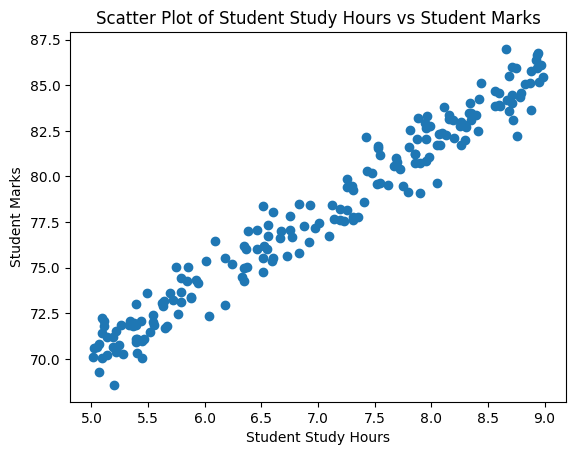

In [9]:
plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.title("Scatter Plot of Student Study Hours vs Student Marks")
plt.show()

In [10]:
# Remove empty cells

In [11]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [12]:
df2 = df.fillna(df.mean())

In [13]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [14]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [15]:
# Split the dataset

In [16]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=51 )
print ("Shape of X_train = ", X_train.shape)
print ("Shape of y_train = ", y_train.shape)
print ("Shape of X_test = ", X_test.shape)
print ("Shape of y_test = ", y_test.shape)

Shape of X_train =  (160, 1)
Shape of y_train =  (160, 1)
Shape of X_test =  (40, 1)
Shape of y_test =  (40, 1)


In [18]:
# y = m*x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(X_train , y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

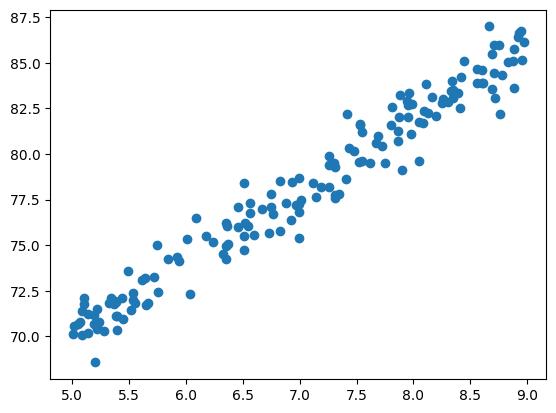

In [21]:
plt.scatter(X_train,y_train)

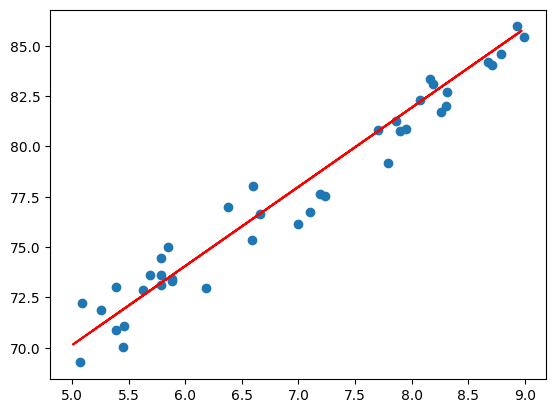

In [22]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train), color = "r" )

In [35]:
from sklearn.cluster import KMeans

In [36]:
# create color map
colormap = np.array(['red', 'lime', 'black', 'blue', 'yellow', 'green', 'red'])

In [37]:
k = 3
# running kmeans clustering into two
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)

In [38]:
# the random state is optionlly, here it is specified so we get determistic clusters.
# this will contain the labels for our predicted clusters (either 0 or 1)
labels = kmeans.labels_
# the centers of the calculated clusters
clusters = kmeans.cluster_centers_
# printing our cluster centers - there will be 2 of them.
print(clusters)

[[6.93451472]
 [5.44574468]
 [8.33661017]]


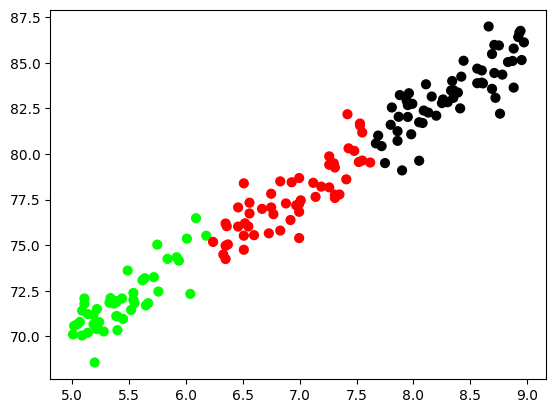

In [39]:
plt.scatter(X_train,y_train, c=colormap[labels], s=40)